# Import libraries & load the datasets

In [1]:
# import basic libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette("pastel")

import warnings
warnings.simplefilter("ignore", UserWarning)

%precision 4

'%.4f'

In [2]:
test = pd.read_csv('Phishing_Test.csv')
train = pd.read_csv('Phishing_Train.csv')
df = pd.concat([test, train], ignore_index=True)

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Visit                   4540 non-null   object 
 1   Tool_Det_Accuracy       4540 non-null   int64  
 2   Tool_Det_Time           4540 non-null   int64  
 3   Threat_Domain           4540 non-null   int64  
 4   Threat_Type             4540 non-null   int64  
 5   Threat_Cost             4540 non-null   int64  
 6   Dem_Gender              4540 non-null   int64  
 7   Dem_Age                 4540 non-null   int64  
 8   Dem_Education           4540 non-null   int64  
 9   Exp_Web_Reliance        4540 non-null   float64
 10  Exp_Trust_Web           4540 non-null   float64
 11  Exp_Past_Loss           4540 non-null   float64
 12  Exp_Past_Enc            4540 non-null   float64
 13  Exp_Risk_Prop           4540 non-null   float64
 14  Exp_Sec_Habit           4540 non-null   

In [4]:
df.shape

(4540, 27)

In [5]:
df.describe()

,Tool_Det_Accuracy,Tool_Det_Time,Threat_Domain,Threat_Type,Threat_Cost,Dem_Gender,Dem_Age,Dem_Education,Exp_Web_Reliance,Exp_Trust_Web,...,ThreatPer_Sus,ThreatPer_Sev,Exp_Self_Eff,ToolPer_Effort_Req,ToolPer_Cost_Det_Error,ToolPer_Usefulness,ToolPer_Trust_Det,Exp_Fam_Dom,Exp_Fam_Site,Tool_Warning
count,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,...,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000
mean,0.509912,0.497797,0.537445,0.500000,0.498899,0.405286,6.169604,3.287445,7.735830,6.397109,...,4.848954,6.249339,6.430039,4.198210,5.240198,5.798651,5.636619,3.566189,1.845551,0.663656
std,0.499957,0.500050,0.498651,0.500055,0.500054,0.491001,8.285357,1.046389,1.501242,1.384585,...,1.967101,2.820462,2.022379,1.660798,2.395256,2.225003,2.187485,2.523355,1.998649,0.472510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.933333,1.000000,...,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.900000,5.500000,...,3.250000,4.018750,5.050000,3.000000,3.266667,4.418750,4.068750,1.500000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,3.000000,3.000000,8.000000,6.500000,...,4.787500,6.775000,6.575000,4.225000,5.100000,5.825000,5.650000,2.900000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,8.833333,7.331250,...,6.125000,8.750000,8.000000,5.375000,7.066667,7.525000,7.375000,5.000000,1.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,7.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [6]:
df.isna().sum()

Visit                     0
Tool_Det_Accuracy         0
Tool_Det_Time             0
Threat_Domain             0
Threat_Type               0
Threat_Cost               0
Dem_Gender                0
Dem_Age                   0
Dem_Education             0
Exp_Web_Reliance          0
Exp_Trust_Web             0
Exp_Past_Loss             0
Exp_Past_Enc              0
Exp_Risk_Prop             0
Exp_Sec_Habit             0
Exp_Trust_Inst            0
ThreatPer_Phish_Aware     0
ThreatPer_Sus             0
ThreatPer_Sev             0
Exp_Self_Eff              0
ToolPer_Effort_Req        0
ToolPer_Cost_Det_Error    0
ToolPer_Usefulness        0
ToolPer_Trust_Det         0
Exp_Fam_Dom               0
Exp_Fam_Site              0
Tool_Warning              0
dtype: int64

Visited    3567
Exited      973
Name: Visit, dtype: int64


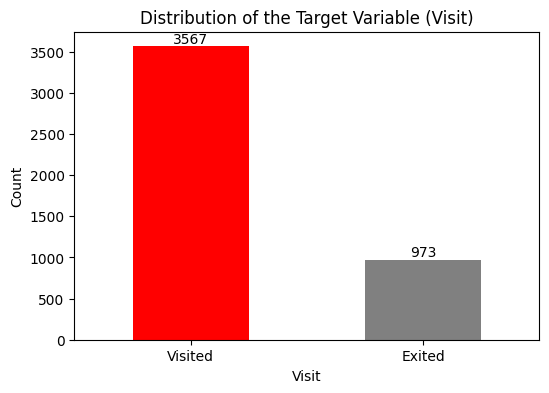

In [7]:
# Distribution of the target variable
target_distribution = df['Visit'].value_counts()

# Debug: Print the target_distribution to check its contents
print(target_distribution)

# Create a bar plot
plt.figure(figsize=(6, 4))
ax = target_distribution.plot(kind='bar', color=['red', 'grey'])
plt.title('Distribution of the Target Variable (Visit)')
plt.xlabel('Visit')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Annotate the bars with their respective counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

plt.show()

In [8]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Iterate through the entire correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]

        # Check if the correlation value is greater than 0.85
        if abs(corr_value) > 0.85:
            print(f"Highly correlated columns: {col1} and {col2}, Correlation: {corr_value}")

Highly correlated columns: ToolPer_Usefulness and ToolPer_Trust_Det, Correlation: 0.8848337950043065


In [9]:
original_dataset = df.copy()

In [10]:
## tranform Dem_Age to its original format
train['Dem_Age'] = train['Dem_Age'] + 18
test['Dem_Age'] = test['Dem_Age'] + 18
df = pd.concat([train, test], ignore_index=True)

# Descriptive Analysis

In [11]:
# "Dem_Gender": 0 = male; 1 = female
# "Dem_Education": 1 = high school; 2 = some college; 3 = associates degree; 4 = bachelor’s degree, etc.
df.groupby(["Dem_Gender", "Dem_Education"]).mean()

<ipython-input-11-9d0f2cc378c8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Dem_Gender", "Dem_Education"]).mean()


Tool_Det_Accuracy  Tool_Det_Time  Threat_Domain  \
Dem_Gender Dem_Education                                                    
0          1                       0.750000       0.000000       0.250000   
           2                       0.492308       0.369231       0.753846   
           3                       0.487936       0.517426       0.466488   
           4                       0.606061       0.606061       0.363636   
           5                       0.568182       0.500000       0.454545   
           6                       0.588235       0.529412       0.882353   
           7                       0.500000       0.750000       0.750000   
1          1                       0.333333       0.666667       0.666667   
           2                       0.512195       0.487805       0.536585   
           3                       0.491667       0.500000       0.550000   
           4                       0.529412       0.470588       0.411765   
           5                       0.656250       0.500000       0.687500   
           6                       0.607143       0.428571       0.821429   
           7                       0.285714       0.428571       0.857143   

                          Threat_Type  Threat_Cost    Dem_Age  \
Dem_Gender Dem_Education                                        
0          1                 0.250000     0.250000  22.750000   
           2                 0.492308     0.507692  19.953846   
           3                 0.506702     0.466488  21.718499   
           4                 0.515152     0.333333  26.787879   
           5                 0.545455     0.431818  32.818182   
           6                 0.470588     0.764706  41.647059   
           7                 0.750000     0.750000  29.500000   
1          1                 0.666667     0.666667  26.000000   
           2                 0.512195     0.512195  20.780488   
           3                 0.479167     0.533333  22.037500   
           4                 0.588235     0.647059  31.294118   
           5                 0.437500     0.406250  34.968750   
           6                 0.500000     0.678571  40.250000   
           7                 0.571429     0.714286  43.714286   

                          Exp_Web_Reliance  Exp_Trust_Web  Exp_Past_Loss  \
Dem_Gender Dem_Education                                                   
0          1                      6.716667       6.031250       3.583333   
           2                      7.469231       6.363077       2.405641   
           3                      7.581680       6.283177       2.181769   
           4                      7.914141       6.369697       2.652525   
           5                      7.711364       6.268182       2.462879   
           6                      7.549020       6.550000       1.854902   
           7                      8.333333       7.543750       3.158333   
1          1                      7.177778       6.625000       1.900000   
           2                      7.374797       6.503659       2.225203   
           3                      8.034861       6.570833       2.093611   
           4                      8.147059       6.552941       2.156863   
           5                      7.789583       6.042969       2.455208   
           6                      7.922619       6.493750       1.942857   
           7                      8.542857       7.082143       3.223810   

                          Exp_Past_Enc  ...  ThreatPer_Sus  ThreatPer_Sev  \
Dem_Gender Dem_Education                ...                                 
0          1                  3.416667  ...       5.368750       7.725000   
           2                  2.841026  ...       4.937308       6.276154   
           3                  2.618231  ...       4.716086       6.253619   
           4                  2.553535  ...       4.665152       6.131818   
           5                  2.737121  ...       4.762500       6.566477

In [12]:
# "Threat_Type": 0 = spoof; 1 = concocted
# "Threat_Domain": 0 = pharmacy; 1 = bank
df.groupby(["Threat_Type", "Threat_Domain"]).mean()

<ipython-input-12-594d5080a6a6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Threat_Type", "Threat_Domain"]).mean()


Tool_Det_Accuracy  Tool_Det_Time  Threat_Cost  \
Threat_Type Threat_Domain                                                  
0           0                       0.523585       0.504717     0.500000   
            1                       0.512397       0.495868     0.504132   
1           0                       0.514423       0.509615     0.490385   
            1                       0.491870       0.483740     0.500000   

                           Dem_Gender    Dem_Age  Dem_Education  \
Threat_Type Threat_Domain                                         
0           0                0.391509  22.886792       3.183962   
            1                0.433884  24.636364       3.347107   
1           0                0.341346  23.774038       3.221154   
            1                0.443089  25.150407       3.373984   

                           Exp_Web_Reliance  Exp_Trust_Web  Exp_Past_Loss  \
Threat_Type Threat_Domain                                                   
0           0                      7.794025       6.420283       2.384906   
            1                      7.680165       6.444525       2.152755   
1           0                      7.859295       6.445433       2.316026   
            1                      7.636043       6.289634       2.064499   

                           Exp_Past_Enc  ...  ThreatPer_Sus  ThreatPer_Sev  \
Threat_Type Threat_Domain                ...                                 
0           0                  2.583491  ...       4.941274       6.124175   
            1                  2.405923  ...       4.833264       6.294628   
1           0                  2.565064  ...       4.926202       6.131851   
            1                  2.423035  ...       4.719512       6.411992   

                           Exp_Self_Eff  ToolPer_Effort_Req  \
Threat_Type Threat_Domain                                     
0           0                  6.494104            4.235259   
            1                  6.564669            4.211880   
1           0                  6.414303            4.125721   
            1                  6.255691            4.214126   

                           ToolPer_Cost_Det_Error  ToolPer_Usefulness  \
Threat_Type Threat_Domain                                               
0           0                            5.097327            5.558608   
            1                            5.524656            5.838740   
1           0                            5.226442            5.921995   
            1                            5.095122            5.861789   

                           ToolPer_Trust_Det  Exp_Fam_Dom  Exp_Fam_Site  \
Threat_Type Threat_Domain                                                 
0           0                       5.458137     2.198585      2.564717   
            1                       5.642872     4.938843      2.203058   
1           0                       5.793870     2.340865      1.252981   
            1                       5.651321     4.430488      1.375122   

                           Tool_Warning  
Threat_Type Threat_Domain                
0           0                  0.669811  
            1                  0.652893  
1           0                  0.664423  
            1                  0.668293  

[4 rows x 24 columns]

<Axes: xlabel='Visit', ylabel='Dem_Age'>

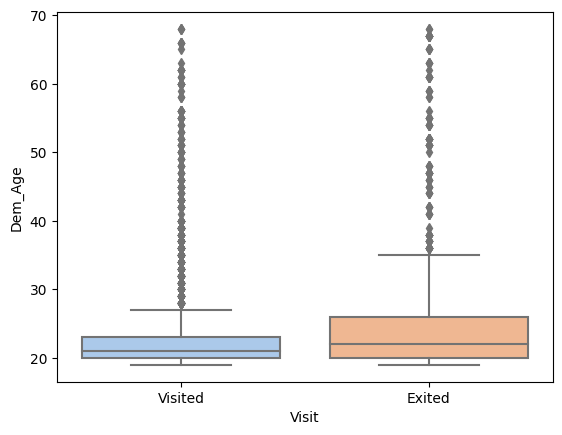

In [13]:
# barplot with age
sns.boxplot(x = "Visit", y = "Dem_Age", data = df)

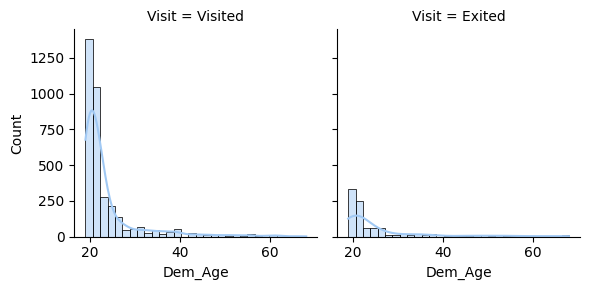

In [14]:
# Draw two histograms of age separated by Visit.
g = sns.FacetGrid(df, col = "Visit")
g = g.map(sns.histplot,  "Dem_Age", bins = 30, kde = True)

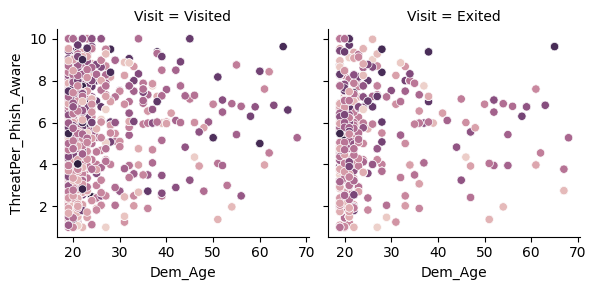

In [15]:
# Draw two scatterplot of age and phishing awareness, phishing susceptibility separated by visit.
# color represents the level of phishing susceptibility
g = sns.FacetGrid(df, col = "Visit")
g = g.map(sns.scatterplot,  "Dem_Age", "ThreatPer_Phish_Aware", "ThreatPer_Sus")

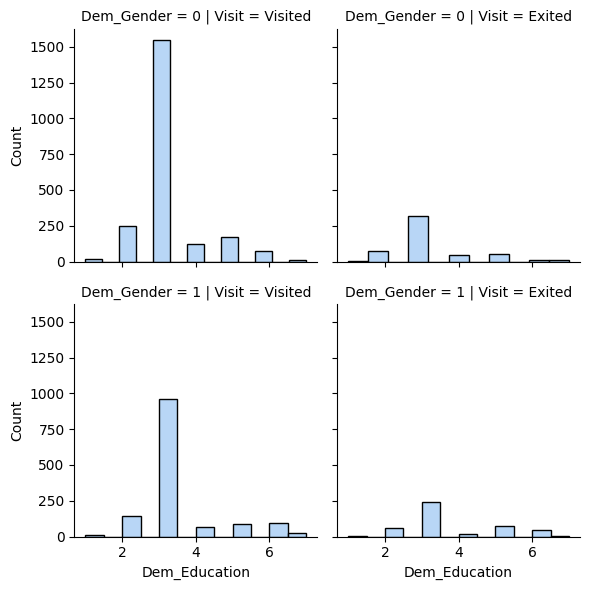

In [16]:
# Plot based on gender and education; Gender: 0 = male, 1 = female
g = sns.FacetGrid(df, col = "Visit", row = "Dem_Gender")
g = g.map(sns.histplot, "Dem_Education")

<Axes: xlabel='ThreatPer_Sus', ylabel='Exp_Past_Loss'>

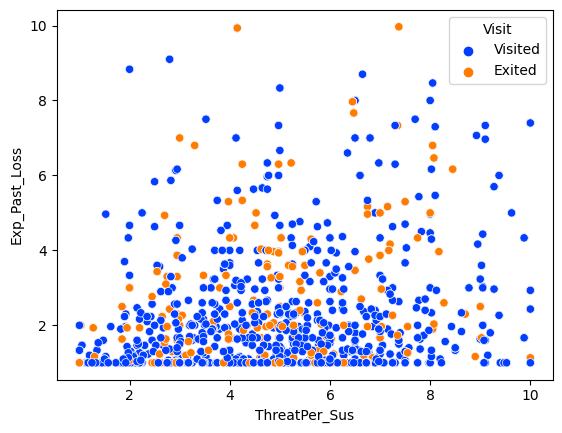

In [17]:
# scatterplot of past loss and phishing susceptibility
sns.scatterplot(x = "ThreatPer_Sus", y = "Exp_Past_Loss",
                     hue = "Visit",
                     palette="bright",
                     data = df)

<Axes: xlabel='Dem_Education', ylabel='Exp_Past_Enc'>

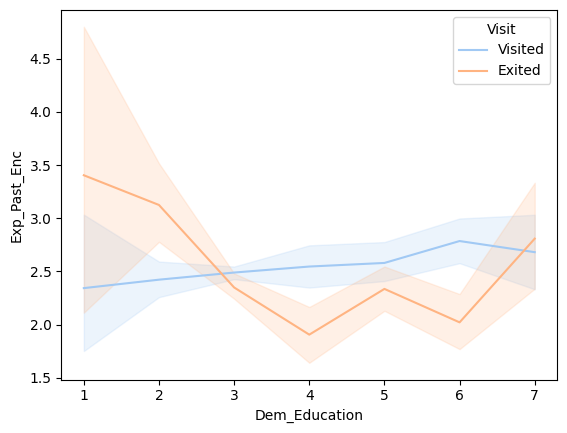

In [18]:
# lineplot of education and past encounters
sns.lineplot(x = "Dem_Education", y = "Exp_Past_Enc",
                     hue = 'Visit',
                     data = df)

# Data Preparation

In [19]:
print(train.Visit.value_counts()/train.Visit.count())

Visited    0.789
Exited     0.211
Name: Visit, dtype: float64


- Since it is not highly skewed towards Visited (less than 95%), we choose not to balance the sampling.

In [20]:
target_name = "Visit"
X = train.drop(target_name, axis = 1)
y = train[target_name]

fnames = list(X.columns)
print(fnames)
findex = X.index

cnames = np.sort(y.unique())
cnames = [str(x) for x in cnames]

print(cnames)

['Tool_Det_Accuracy', 'Tool_Det_Time', 'Threat_Domain', 'Threat_Type', 'Threat_Cost', 'Dem_Gender', 'Dem_Age', 'Dem_Education', 'Exp_Web_Reliance', 'Exp_Trust_Web', 'Exp_Past_Loss', 'Exp_Past_Enc', 'Exp_Risk_Prop', 'Exp_Sec_Habit', 'Exp_Trust_Inst', 'ThreatPer_Phish_Aware', 'ThreatPer_Sus', 'ThreatPer_Sev', 'Exp_Self_Eff', 'ToolPer_Effort_Req', 'ToolPer_Cost_Det_Error', 'ToolPer_Usefulness', 'ToolPer_Trust_Det', 'Exp_Fam_Dom', 'Exp_Fam_Site', 'Tool_Warning']
['Exited', 'Visited']


In [21]:
X_train = train.drop(target_name, axis = 1)
y_train = train[target_name]
X_test = test.drop(target_name, axis = 1)
y_test = test[target_name]

# Predictive Analysis - Classification Modelling

## Model 1: Decision Tree
- RandomizedSearchCV for parameter tuning

In [22]:
from scipy.stats import uniform, randint
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [23]:
scv = StratifiedKFold(n_splits = 6, shuffle = True, random_state = 1)

In [24]:
# use gridsearchCV to find the best model
dt = DecisionTreeClassifier(random_state = 1)

param_rand = {'max_depth': randint(5, 10),
              'criterion': ('entropy', 'gini'),
              'min_impurity_decrease': uniform(0.001, 0.002) }

# Use the n_iter to control the number of paramter combinations.
rand_clf = RandomizedSearchCV(dt,
                              param_rand,
                              n_iter = 50,
                              random_state = 1,
                              cv = scv,
                              verbose = 3,
                              scoring = 'accuracy',
                              return_train_score = True)
rand_clf.fit(X_train, y_train)

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV 1/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.830, test=0.796) total time=   0.0s
[CV 2/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.810) total time=   0.0s
[CV 3/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.838, test=0.794) total time=   0.0s
[CV 4/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.798) total time=   0.0s
[CV 5/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.842, test=0.820) total time=   0.0s
[CV 6/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.825, test=0.790) total time=   0.0s
[CV 1/6] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.844, te

RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=1), n_iter=50,
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4e6d167ac0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b4e66ffa4a0>},
                   random_state=1, return_train_score=True, scoring='accuracy',
                   verbose=3)

In [25]:
# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {rand_clf.best_params_}")
print(f"Best score is {rand_clf.best_score_:.2%}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_impurity_decrease': 0.0010547751863958523}
Best score is 82.87%


In [26]:
y_pred_grid = rand_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_grid)
print(f"The test data performance for the best model is {acc_dt:.2%}")
print(classification_report(y_test, y_pred_grid, digits = 4))

The test data performance for the best model is 83.31%
              precision    recall  f1-score   support

      Exited     0.6781    0.4647    0.5515       340
     Visited     0.8607    0.9375    0.8975      1200

    accuracy                         0.8331      1540
   macro avg     0.7694    0.7011    0.7245      1540
weighted avg     0.8204    0.8331    0.8211      1540



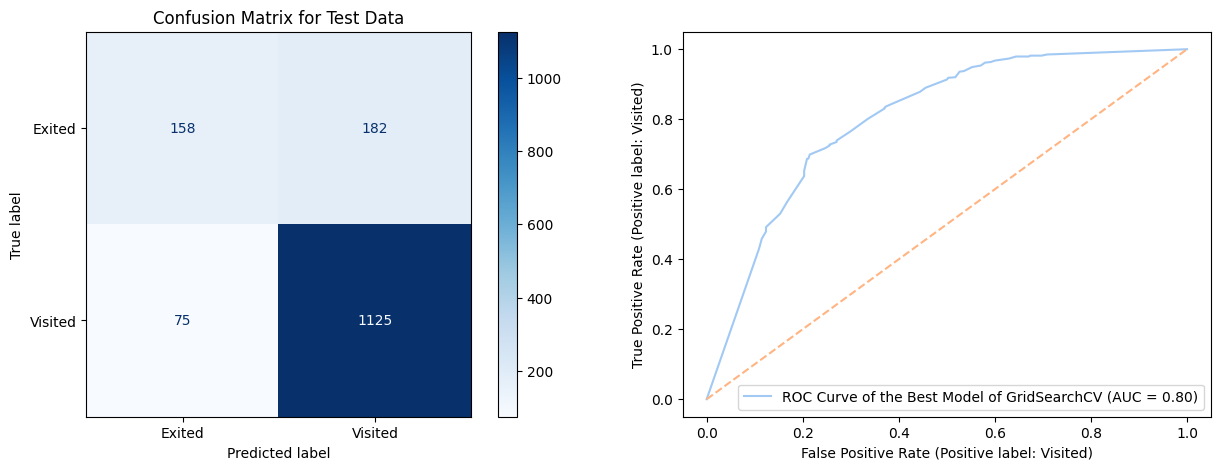

In [27]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(rand_clf, X_test, y_test, name="ROC Curve of the Best Model of GridSearchCV", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("DT_ConfusionMatrix_Test.pdf")
fig.savefig("DT_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 2: K-Nearest Neighbors (KNN)
- GridSearchCV for tuning the best K

In [28]:
from sklearn.neighbors import KNeighborsClassifier

The best k is 1 with a training accuracy of 84.47%


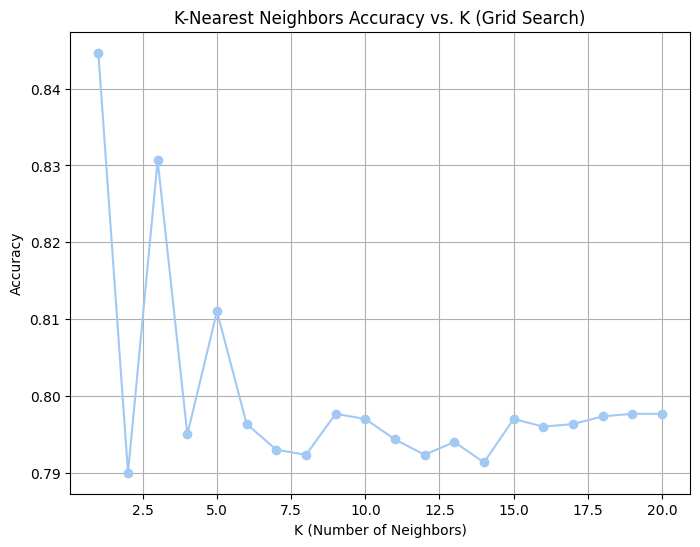

In [29]:
# Define the parameter grid to search for the best k and metric value
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean'],
}

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Access the results
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Print the best k and corresponding accuracy
print(f"The best k is {best_k} with a training accuracy of {best_accuracy:.2%}")

# Plot the results
cv_results = grid_search.cv_results_
k_values = [param['n_neighbors'] for param in cv_results['params']]
accuracies = cv_results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors Accuracy vs. K (Grid Search)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [39]:
# Train when K = 1
knn = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn.fit(X_train, y_train)

# Test
y_test_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_test_knn)
print(f"The test data performance for the K-nearest neighbor is {acc_knn:.2%}")
print(classification_report(y_test, y_test_knn, digits = 4))

The test data performance for the K-nearest neighbor is 84.03%
              precision    recall  f1-score   support

      Exited     0.6407    0.6294    0.6350       340
     Visited     0.8955    0.9000    0.8978      1200

    accuracy                         0.8403      1540
   macro avg     0.7681    0.7647    0.7664      1540
weighted avg     0.8393    0.8403    0.8397      1540



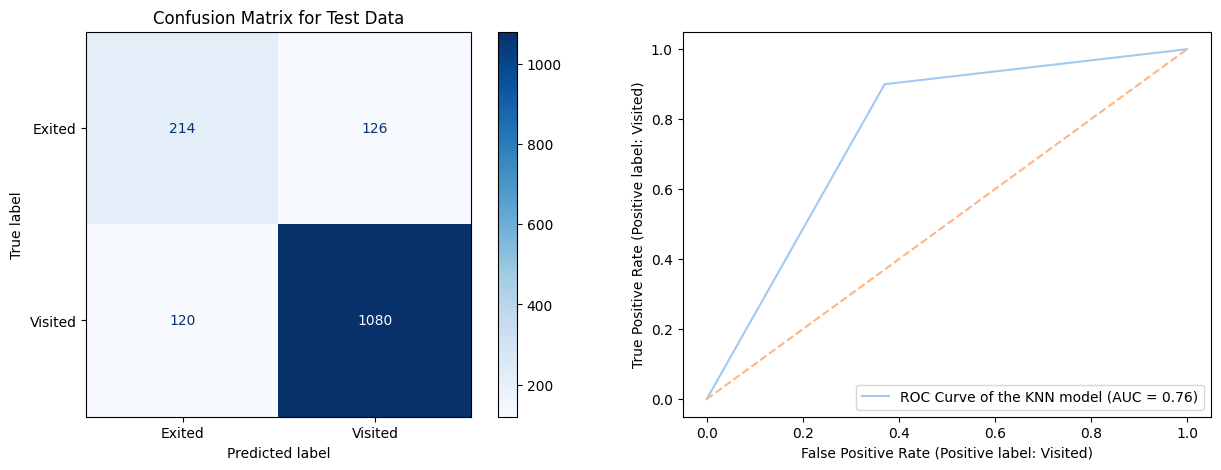

In [31]:
conf_matrix = confusion_matrix(y_test, y_test_knn)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, name="ROC Curve of the KNN model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("Knn_ConfusionMatrix_Test.pdf")
fig.savefig("Knn_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 3: Logistic Regression
- Polynomial (manual search)

In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [33]:
# Create Polynomial features
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [34]:
# Train
lg_poly = LogisticRegression(random_state = 1)
lg_poly.fit(X_train_poly, y_train)

# Test
y_pred_lgpoly= lg_poly.predict(X_test_poly)
acc_log_poly = accuracy_score(y_test, y_pred_lgpoly)
print(f"The test data performance for the logistic regression is {acc_log_poly:.2%}")
print(classification_report(y_test, y_pred_lgpoly, digits = 4))

The test data performance for the logistic regression is 80.58%
              precision    recall  f1-score   support

      Exited     0.6358    0.2824    0.3910       340
     Visited     0.8243    0.9542    0.8845      1200

    accuracy                         0.8058      1540
   macro avg     0.7300    0.6183    0.6378      1540
weighted avg     0.7827    0.8058    0.7756      1540



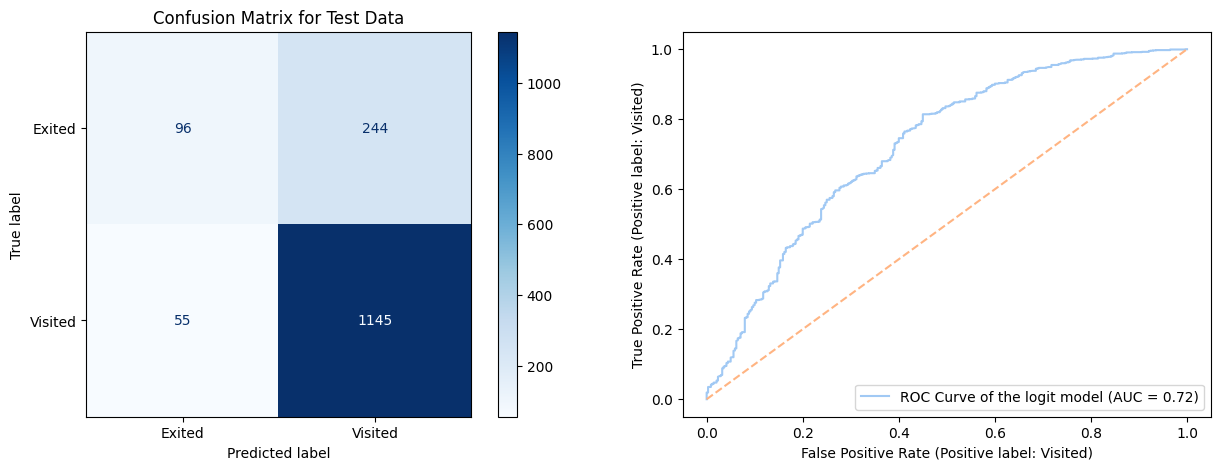

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_lgpoly)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(lg_poly, X_test_poly, y_test, name="ROC Curve of the logit model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("lg_ConfusionMatrix_Test.pdf")
fig.savefig("lg_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 4: Support Vector Machines (SVM)
- RBF (Gaussian) Kernel
- RandomizedSearchCV for parameter tuning

In [36]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import uniform
import numpy as np

In [40]:
# Create PolynomialFeatures and StandardScaler instances
poly_features = PolynomialFeatures()
scaler = StandardScaler()

# Apply feature transformation to the training data
X_train_poly = poly_features.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_poly)

# Define the hyperparameter search space for the SVM model
param_dist = {
    'gamma': uniform(0.01, 0.99),
    'C': uniform(1, 7),
}

# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=1, probability=True)

# Create a RandomizedSearchCV object
rand_search = RandomizedSearchCV(
    svm_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=3,
    random_state=1,
    scoring='accuracy',
    return_train_score=True,
)

# Fit the SVM model with transformed training data
rand_search.fit(X_train_scaled, y_train)

# Apply feature transformation to the test data
X_test_poly = poly_features.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.973, test=0.835) total time=   4.7s
[CV 2/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.965, test=0.846) total time=   5.6s
[CV 3/3] END C=3.919154032918018, gamma=0.7231212485077365;, score=(train=0.970, test=0.856) total time=   4.6s
[CV 1/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.969, test=0.835) total time=   5.3s
[CV 2/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.962, test=0.846) total time=   4.4s
[CV 3/3] END C=1.0008006237214142, gamma=0.30930924690552136;, score=(train=0.968, test=0.856) total time=   5.2s
[CV 1/3] END C=2.027291235719791, gamma=0.10141520882110981;, score=(train=0.969, test=0.839) total time=   4.4s
[CV 2/3] END C=2.027291235719791, gamma=0.10141520882110981;, score=(train=0.962, test=0.849) total time=   5.2s
[CV 3/3] END C=2.027291235719791, g

In [41]:
# Evaluate the best model with RBF kernel on the test set
best_svm_rbf = rand_search.best_estimator_
print(best_svm_rbf)
y_test_svm_rbf = best_svm_rbf.predict(X_test_scaled)
acc_rbf_svm = accuracy_score(y_test, y_test_svm_rbf)

# Print the test performance and classification report
print(f"The test data performance for the SVM with RBF kernel is {acc_rbf_svm:.2%}")
print(classification_report(y_test, y_test_svm_rbf, digits=4))

SVC(C=1.5953094795884453, gamma=0.04866423540055354, probability=True,
    random_state=1)
The test data performance for the SVM with RBF kernel is 84.94%
              precision    recall  f1-score   support

      Exited     0.7231    0.5147    0.6014       340
     Visited     0.8729    0.9442    0.9071      1200

    accuracy                         0.8494      1540
   macro avg     0.7980    0.7294    0.7543      1540
weighted avg     0.8398    0.8494    0.8396      1540



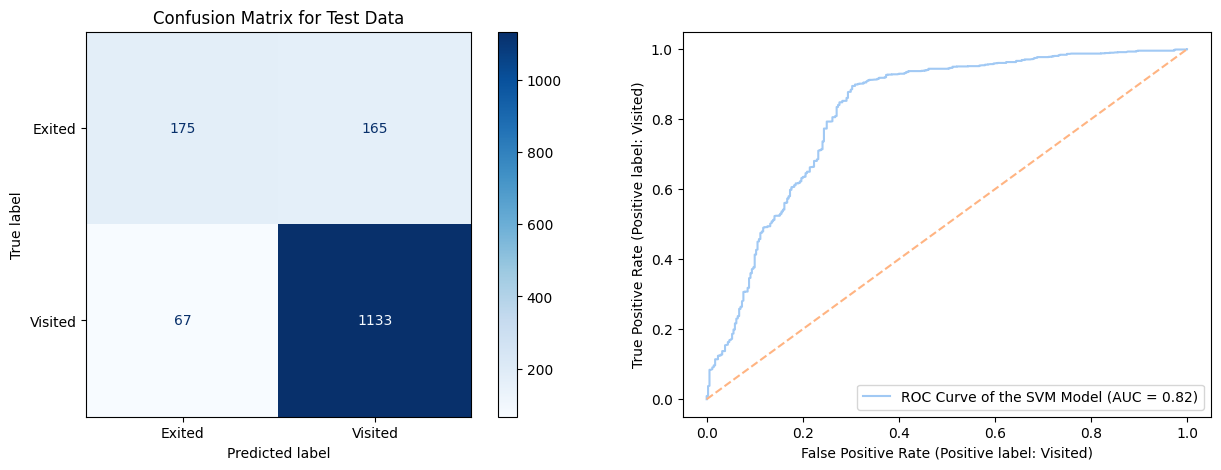

In [42]:
conf_matrix = confusion_matrix(y_test, y_test_svm_rbf)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(best_svm_rbf, X_test_scaled, y_test, name="ROC Curve of the SVM Model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("svm_ConfusionMatrix_Test.pdf")
fig.savefig("svm_ROC_Grid.pdf")

# Show the plots
plt.show()

## Model 5: Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
# Train
nn = MLPClassifier(hidden_layer_sizes=(100,150,100),
                   alpha = 0.0001,
                   max_iter = 1000,
                   activation = 'relu',
                   solver = 'lbfgs',
                   learning_rate = "adaptive",
                   learning_rate_init = 0.1,
                   random_state = 1)
nn.fit(X_train, y_train)

# Test
y_test_nn = nn.predict(X_test)
acc_nn = accuracy_score(y_test, y_test_nn)
print(f"The test data performance for the neural network is {acc_nn:.2%}")
print(classification_report(y_test, y_test_nn, digits = 4))

The test data performance for the neural network is 84.68%
              precision    recall  f1-score   support

      Exited     0.6576    0.6382    0.6478       340
     Visited     0.8983    0.9058    0.9021      1200

    accuracy                         0.8468      1540
   macro avg     0.7780    0.7720    0.7749      1540
weighted avg     0.8452    0.8468    0.8459      1540



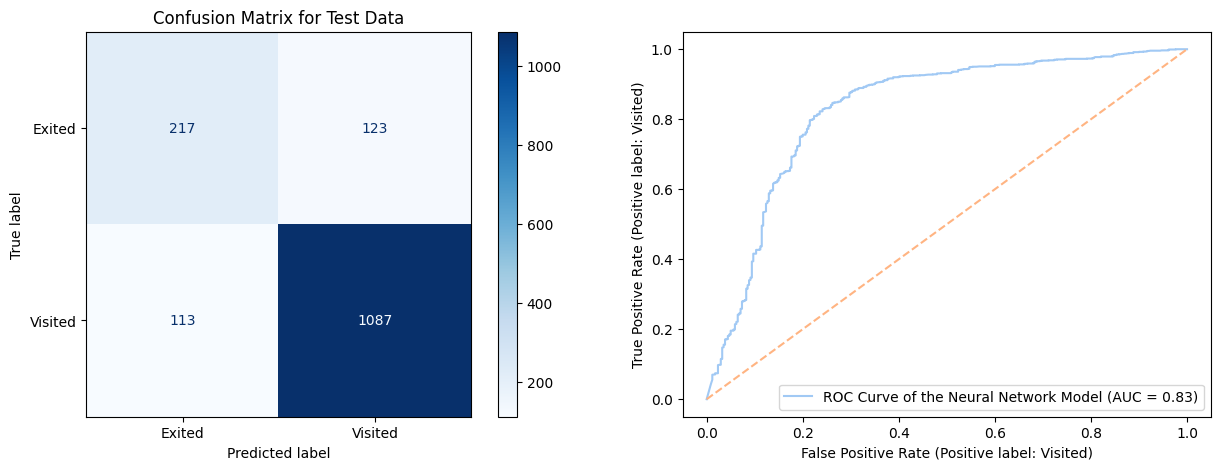

In [45]:
conf_matrix = confusion_matrix(y_test, y_test_nn)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=cnames)
cm_display.plot(cmap=plt.cm.Blues, values_format="d", ax=axes[0])
axes[0].set_title("Confusion Matrix for Test Data")

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(nn, X_test, y_test, name="ROC Curve of the Neural Network Model", ax=axes[1])
axes[1].plot([0, 1], [0, 1], linestyle='--')

# Save both plots to separate files
fig.savefig("nn_ConfusionMatrix_Test.pdf")
fig.savefig("nn_ROC_Grid.pdf")

# Show the plots
plt.show()

## Conclusion

In [46]:
models = pd.DataFrame({
    'Model': ['Decision Tree RandomizedSearch','KNN GridSearch','Logistic Regression (Poly)', 'RBF SVM RandomizedSearch', 'Neural Network'],
    'Random_state': [1, 1, 1, 1, 1],
    'Accuracy Score': [acc_dt, acc_knn,acc_log_poly,acc_rbf_svm, acc_nn]})
models.round(decimals = 4).sort_values(by = 'Accuracy Score', ascending = False)

,Model,Random_state,Accuracy Score
3,RBF SVM RandomizedSearch,1,0.8494
4,Neural Network,1,0.8468
1,KNN GridSearch,1,0.8403
0,Decision Tree RandomizedSearch,1,0.8331
2,Logistic Regression (Poly),1,0.8058


# Ensemble Methods

In [48]:
from scipy.stats import uniform, randint
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

## Voting
- Based on the five models above

In [49]:
# create an estimator
classifiers = [('decisionTree', rand_clf),
               ('neuralNet', nn),
               ('neighbor', grid_search),
               ('logistic', lg_poly),
               ('svm', rand_search)]

# train
voting_clf = VotingClassifier(estimators = classifiers,
                              voting = 'hard')
voting_clf.fit(X_train, y_train)


# test
y_test_vh = voting_clf.predict(X_test)
acc_vh = accuracy_score(y_test, y_test_vh)

print(f"The test data performance for Voting (hard) is {acc_vh:.2%}")
print(classification_report(y_test, y_test_vh, digits = 4))

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV 1/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.830, test=0.796) total time=   0.0s
[CV 2/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.810) total time=   0.0s
[CV 3/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.838, test=0.794) total time=   0.0s
[CV 4/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.798) total time=   0.0s
[CV 5/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.842, test=0.820) total time=   0.0s
[CV 6/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.825, test=0.790) total time=   0.0s
[CV 1/6] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.844, te

## Stacking

In [50]:
# train
stack_clf = StackingClassifier(estimators = classifiers,
                               final_estimator = LogisticRegression()) # final predictor

stack_clf.fit(X_train, y_train)

# test
y_test_sk = stack_clf.predict(X_test)
acc_sk = accuracy_score(y_test, y_test_sk)

print(f"The test data performance for Stacking is {acc_sk:.2%}")
print(classification_report(y_test, y_test_sk, digits = 4))

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV 1/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.830, test=0.796) total time=   0.1s
[CV 2/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.810) total time=   0.1s
[CV 3/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.838, test=0.794) total time=   0.1s
[CV 4/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.834, test=0.798) total time=   0.1s
[CV 5/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.842, test=0.820) total time=   0.1s
[CV 6/6] END criterion=gini, max_depth=8, min_impurity_decrease=0.002440648986884316;, score=(train=0.825, test=0.790) total time=   0.1s
[CV 1/6] END criterion=gini, max_depth=6, min_impurity_decrease=0.0016046651452636795;, score=(train=0.844, te

## Bagging

In [51]:
# train
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10, random_state  = 1),
                            n_estimators = 100,
                            random_state = 1)
bag_clf.fit(X_train, y_train)

# test
y_test_bag = bag_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_test_bag)

print(f"The test data performance for Bagging is {acc_bag:.2%}")
print(classification_report(y_test, y_test_bag, digits = 4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The test data performance for Bagging is 85.06%
              precision    recall  f1-score   support

      Exited     0.7723    0.4588    0.5756       340
     Visited     0.8625    0.9617    0.9094      1200

    accuracy                         0.8506      1540
   macro avg     0.8174    0.7102    0.7425      1540
weighted avg     0.8426    0.8506    0.8357      1540



## Random Forest

In [52]:
# train
rf_clf = RandomForestClassifier(max_depth = 15, max_features = 0.9,
                                n_estimators = 100,
                                random_state = 1)
rf_clf.fit(X_train, y_train)

# test
y_test_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_test_rf)

print(f"The test data performance for Random Forest is {acc_rf:.2%}")
print(classification_report(y_test, y_test_rf, digits = 4))

The test data performance for Random Forest is 85.19%
              precision    recall  f1-score   support

      Exited     0.7059    0.5647    0.6275       340
     Visited     0.8833    0.9333    0.9076      1200

    accuracy                         0.8519      1540
   macro avg     0.7946    0.7490    0.7675      1540
weighted avg     0.8441    0.8519    0.8458      1540



### Feature Importance

In [53]:
# create a dataframe to store features names and the importance
rf_imp = pd.DataFrame(list(zip(X_train.columns, rf_clf.feature_importances_)),
                     columns = ['feature', 'rf_imp_score']).sort_values(by = 'rf_imp_score', ascending = False)
rf_imp

,feature,rf_imp_score
22,ToolPer_Trust_Det,0.076528
20,ToolPer_Cost_Det_Error,0.072237
25,Tool_Warning,0.071505
24,Exp_Fam_Site,0.068592
21,ToolPer_Usefulness,0.063586
19,ToolPer_Effort_Req,0.056674
12,Exp_Risk_Prop,0.056622
10,Exp_Past_Loss,0.051836
15,ThreatPer_Phish_Aware,0.049022
6,Dem_Age,0.048524


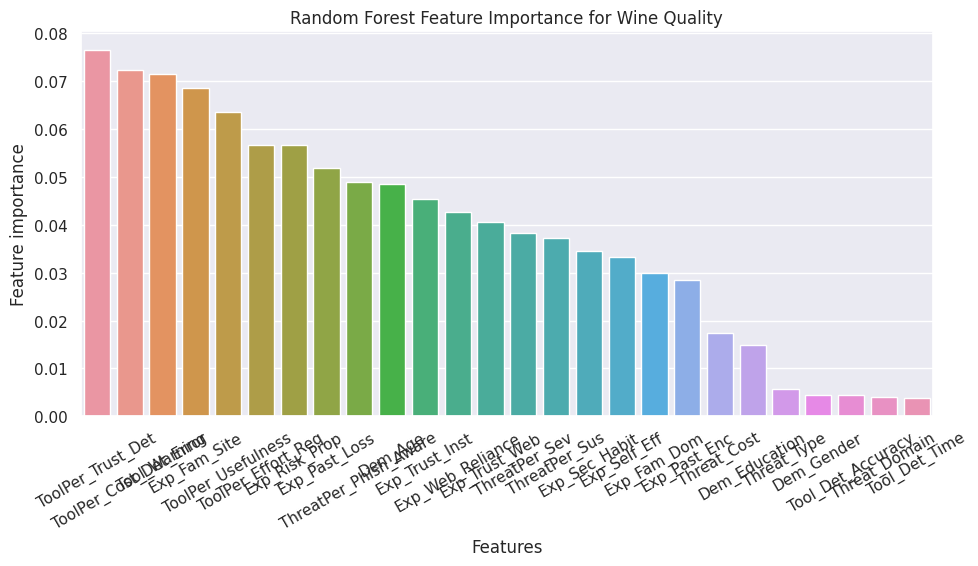

In [54]:
# set figure size
sns.set(rc={'figure.figsize':(11,5)})
ax = sns.barplot(x = 'feature', y = 'rf_imp_score', data = rf_imp)
ax.set_title('Random Forest Feature Importance for Wine Quality')
ax.set(ylabel='Feature importance')
ax.set(xlabel='Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30); # rotate x label

## AdaBoosting

In [55]:
# train
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 15,
                            random_state = 1), n_estimators = 100,
                             #algorithm = "SAMME",
                             random_state = 1)
ada_clf.fit(X_train, y_train)

# test
y_test_ada = ada_clf.predict(X_test)
acc_ada = accuracy_score(y_test, y_test_ada)

print(f"The test data performance for Adaboost is {acc_ada:.2%}")
print(classification_report(y_test, y_test_ada, digits = 4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The test data performance for Adaboost is 84.29%
              precision    recall  f1-score   support

      Exited     0.6476    0.6324    0.6399       340
     Visited     0.8965    0.9025    0.8995      1200

    accuracy                         0.8429      1540
   macro avg     0.7721    0.7674    0.7697      1540
weighted avg     0.8416    0.8429    0.8422      1540



In [56]:
# create a dataframe to store features names and the importance
ada_imp = pd.DataFrame(list(zip(X_train.columns, ada_clf.feature_importances_)),
                     columns = ['feature', 'ada_imp_score']).sort_values(by = 'ada_imp_score', ascending = False)
ada_imp

,feature,ada_imp_score
24,Exp_Fam_Site,0.195546
16,ThreatPer_Sus,0.094327
10,Exp_Past_Loss,0.071000
15,ThreatPer_Phish_Aware,0.066214
25,Tool_Warning,0.064618
19,ToolPer_Effort_Req,0.061408
12,Exp_Risk_Prop,0.057698
8,Exp_Web_Reliance,0.046182
23,Exp_Fam_Dom,0.041062
5,Dem_Gender,0.039529


## XGBoost

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [63]:
xg = XGBClassifier(n_estimators = 100,
                   random_state = 1)
xg.fit(X_train, y_train_encoded)

# test
y_test_xg = xg.predict(X_test)
acc_xg = accuracy_score(y_test_encoded, y_test_xg)

print(f"The test data performance for XGBoost is {acc_xg:.2%}")
print(classification_report(y_test_encoded, y_test_xg, digits = 4))

The test data performance for XGBoost is 85.65%
              precision    recall  f1-score   support

           0     0.6820    0.6559    0.6687       340
           1     0.9035    0.9133    0.9084      1200

    accuracy                         0.8565      1540
   macro avg     0.7928    0.7846    0.7885      1540
weighted avg     0.8546    0.8565    0.8555      1540



In [64]:
# create a dataframe to store features names and the importance
xg_imp = pd.DataFrame(list(zip(X_train.columns, xg.feature_importances_)),
                     columns = ['feature', 'xg_imp_score']).sort_values(by = 'xg_imp_score', ascending = False)
xg_imp

,feature,xg_imp_score
4,Threat_Cost,0.122592
22,ToolPer_Trust_Det,0.061655
21,ToolPer_Usefulness,0.051762
20,ToolPer_Cost_Det_Error,0.049651
23,Exp_Fam_Dom,0.046370
3,Threat_Type,0.044282
10,Exp_Past_Loss,0.043748
12,Exp_Risk_Prop,0.043069
8,Exp_Web_Reliance,0.041722
17,ThreatPer_Sev,0.040387


## Conclusion of Ensemble Methods

In [67]:
models = pd.DataFrame({
    'Model': ['Voting Hard', 'Stacking', 'Bagging', 'Random Forest',
              'AdaBoost', 'XGBoost'],
    'Score': [acc_vh, acc_sk,acc_bag, acc_rf,
              acc_ada, acc_xg]})
models.round(decimals = 4).sort_values(by = 'Score', ascending = False)

,Model,Score
5,XGBoost,0.8565
1,Stacking,0.8532
0,Voting Hard,0.8526
3,Random Forest,0.8519
2,Bagging,0.8506
4,AdaBoost,0.8429
